In [1]:
!unzip /content/data1.zip

Archive:  /content/data1.zip
   creating: data/
  inflating: __MACOSX/._data         
  inflating: data/houses_to_rent.csv  
  inflating: __MACOSX/data/._houses_to_rent.csv  
  inflating: data/Advertising.csv    
  inflating: __MACOSX/data/._Advertising.csv  
  inflating: data/breastcancer_test.csv  
  inflating: __MACOSX/data/._breastcancer_test.csv  
  inflating: data/.DS_Store          
  inflating: __MACOSX/data/._.DS_Store  
  inflating: data/breastcancer_training.csv  
  inflating: __MACOSX/data/._breastcancer_training.csv  
  inflating: data/Vehicle.csv        
  inflating: __MACOSX/data/._Vehicle.csv  
  inflating: data/concrete_data.csv  
  inflating: __MACOSX/data/._concrete_data.csv  
  inflating: data/iris-with-errors.csv  
  inflating: __MACOSX/data/._iris-with-errors.csv  
  inflating: data/winequality-red.csv  
  inflating: __MACOSX/data/._winequality-red.csv  
  inflating: data/iris.csv           
  inflating: __MACOSX/data/._iris.csv  
  inflating: data/BreastCancer.cs

In [2]:
# Leia os dados com erro (iris-with-errors.csv), faça a limpeza e remova as
# duas últimas colunas. Quantas linhas e colunas sobraram nos dados?

import random
random.seed(1)
import pandas as pd
import matplotlib.pyplot as plt

# Ler arquivo
data = pd.read_csv('data/iris-with-errors.csv', header=(0))
print("Número de linhas e colunas iniciais:",data.shape)
print("-----------------------------------------------------------------")

# Verificar linhas duplicadas
linhas_duplicadas = data.duplicated()
total_duplicadas = linhas_duplicadas.sum()
print(f"Total de linhas duplicadas: {total_duplicadas}")
df_duplicadas = data[linhas_duplicadas]
print("Linhas duplicadas:")
print(df_duplicadas)

# Remove as linhas duplicadas
data2 = data.drop_duplicates()
print("Número de linhas e colunas sem duplicadas:",data2.shape)
print("-----------------------------------------------------------------")

# Verificar linhas com NaN
linhas_com_nan = data2.isna().any(axis=1)
total_com_nan = linhas_com_nan.sum()
print(f"Total de linhas com valores NaN: {total_com_nan}")
df_com_nan = data2[linhas_com_nan]
print("Linhas com valores NaN:")
print(df_com_nan)

# Remove as linhas com NaN
data3 = data2.dropna()
print("Número de linhas e colunas sem NaN:",data3.shape)
print("-----------------------------------------------------------------")

# Verificar se tem linhas com "?"
linhas_com_interrogacao = data3.map(lambda x: x == '?').any(axis=1)
total_com_interrogacao = linhas_com_interrogacao.sum()
print(f"Total de linhas com '?': {total_com_interrogacao}")
df_com_interrogacao = data3[linhas_com_interrogacao]
print("Linhas com '?':")
print(df_com_interrogacao)

# Remove as linhas com "?"
data4 = data3[~linhas_com_interrogacao]
print("Número de linhas e colunas sem ?:",data4.shape)
print("-----------------------------------------------------------------")

# Remover as duas últimas colunas
total_colunas = len(data4.columns)
data5 = data4.iloc[:, :total_colunas - 2]
data5 = data5.reset_index(drop=True)
print("DataFrame sem as duas últimas colunas:")
print(data5)
print("Número de linhas e colunas final:",data5.shape)
print("-----------------------------------------------------------------")

Número de linhas e colunas iniciais: (25, 5)
-----------------------------------------------------------------
Total de linhas duplicadas: 5
Linhas duplicadas:
   sepal_length sepal_width  petal_length petal_width    species
1           5.1         3.5           1.4         0.2  duplicada
4           5.1         3.5           1.4         0.2  duplicada
8           5.4         3.9           1.7         0.4  duplicada
14          4.4         2.9           1.4         0.2  duplicada
17          4.4         2.9           1.4         0.2  duplicada
Número de linhas e colunas sem duplicadas: (20, 5)
-----------------------------------------------------------------
Total de linhas com valores NaN: 3
Linhas com valores NaN:
   sepal_length sepal_width  petal_length petal_width species
5           NaN         3.1           1.5         0.2  setosa
9           4.6         3.4           1.4         NaN  setosa
24          NaN         3.8           1.5         0.3  setosa
Número de linhas e colunas

In [5]:
data_iris = pd.read_csv('data/iris.csv', header=(0))
data_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
# Leia os dados com erro novamente e insira a media de cada atributo onde for encontrada
# NaN e '?'. Quais os valores das medianas obtidas para os atributos?

import numpy as np

data6 = data.replace('?', np.nan)
for coluna in data6.columns[:-1]:
    data6[coluna] = pd.to_numeric(data6[coluna], errors='coerce')
colunas_numericas = data6.columns[:-1]
data7 = data6
data7[colunas_numericas] = data7[colunas_numericas].fillna(data7[colunas_numericas].mean())

medianas = data7[colunas_numericas].median().round(2)
print("Medianas de cada atributo:")
print(medianas)

Medianas de cada atributo:
sepal_length    5.02
sepal_width     3.44
petal_length    1.40
petal_width     0.20
dtype: float64


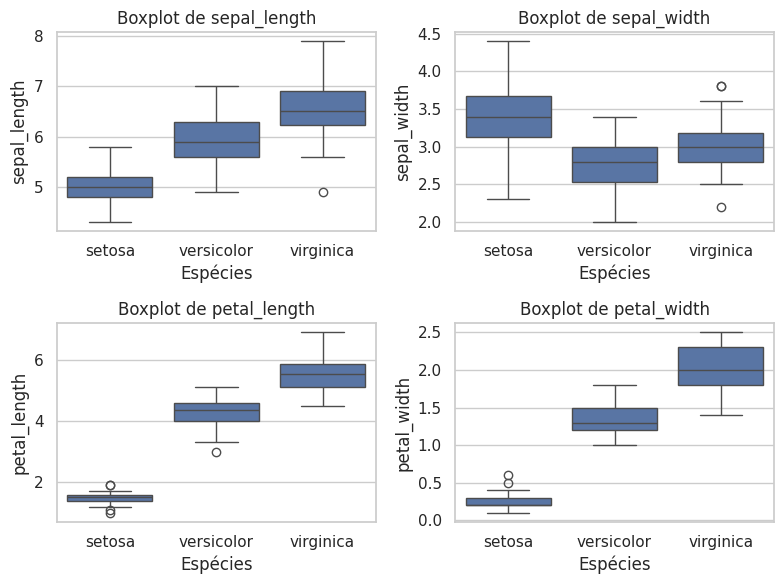

------------------------------------------------------------------------------------------------------------------------
Ao visualizar os boxplots, podemos identificar os outliers como sendo os pontos que saem fora dos bigodes.
Os bigodes são as linhas que se estendem a partir das extremidades da caixa até os valores extremos dos dados
que não são considerados outliers. Os bigodes normalmente se estendem até 1,5 vezes o intervalo interquartil (1,5 × IQR)
acima do terceiro quartil e abaixo do primeiro quartil.
Assim, notamos que todos os atributos apresentam outliers.


In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o dataset Iris a partir de um arquivo CSV
df = pd.read_csv('data/iris.csv')

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
features = df.columns[:-1]
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(f'Boxplot de {feature}')
    plt.xlabel('Espécies')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

print('------------------------------------------------------------------------------------------------------------------------')
print('Ao visualizar os boxplots, podemos identificar os outliers como sendo os pontos que saem fora dos bigodes.')
print('Os bigodes são as linhas que se estendem a partir das extremidades da caixa até os valores extremos dos dados')
print('que não são considerados outliers. Os bigodes normalmente se estendem até 1,5 vezes o intervalo interquartil (1,5 × IQR)')
print('acima do terceiro quartil e abaixo do primeiro quartil.')
print("Assim, notamos que todos os atributos apresentam outliers.")


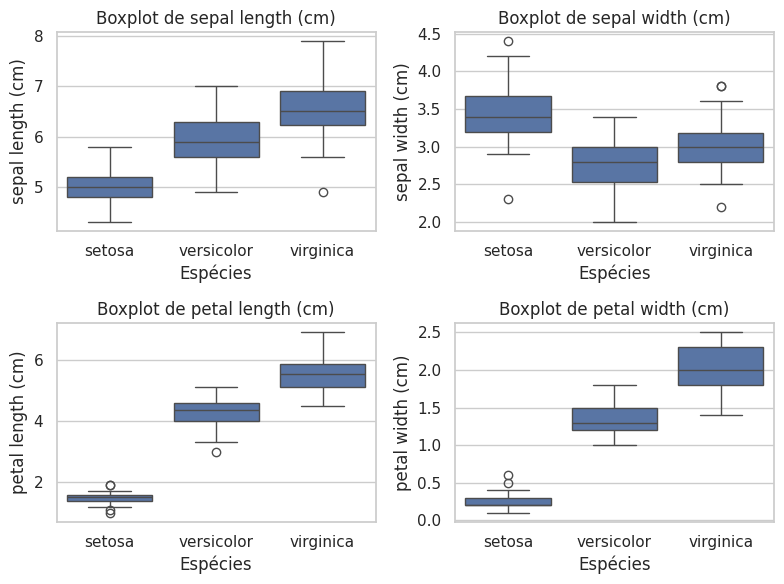

------------------------------------------------------------------------------------------------------------------------
Ao visualizar os boxplots, podemos identificar os outliers como sendo os pontos que saem fora dos bigodes.
Os bigodes são as linhas que se estendem a partir das extremidades da caixa até os valores extremos dos dados
que não são considerados outliers. Os bigodes normalmente se estendem até 1,5 vezes o intervalo interquartil (1,5 × IQR)
acima do terceiro quartil e abaixo do primeiro quartil.
Assim, notamos que todos os atributos apresentam outliers.


In [19]:
# Monte um boxplot para cada variável dos dados da Iris.
# Quais atributos apresentam outliers?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(f'Boxplot de {feature}')
    plt.xlabel('Espécies')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()
print('------------------------------------------------------------------------------------------------------------------------')
print('Ao visualizar os boxplots, podemos identificar os outliers como sendo os pontos que saem fora dos bigodes.')
print('Os bigodes são as linhas que se estendem a partir das extremidades da caixa até os valores extremos dos dados')
print('que não são considerados outliers. Os bigodes normalmente se estendem até 1,5 vezes o intervalo interquartil (1,5 × IQR)')
print('acima do terceiro quartil e abaixo do primeiro quartil.')
print("Assim, notamos que todos os atributos apresentam outliers.")

--------------------------------------------------------------------
Matriz de Correlação:
            Unnamed: 0    TV  radio  newspaper  sales
Unnamed: 0        1.00  0.02  -0.11      -0.15  -0.05
TV                0.02  1.00   0.05       0.06   0.78
radio            -0.11  0.05   1.00       0.35   0.58
newspaper        -0.15  0.06   0.35       1.00   0.23
sales            -0.05  0.78   0.58       0.23   1.00
--------------------------------------------------------------------


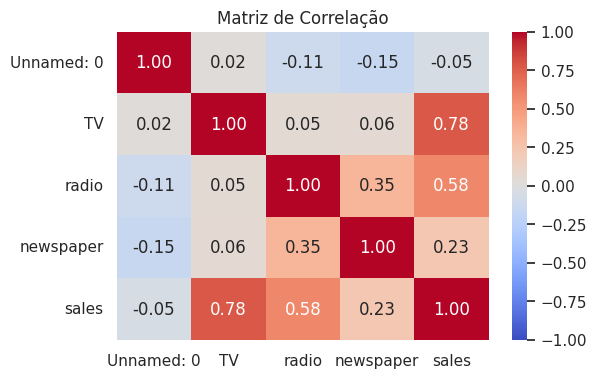

--------------------------------------------------------------------
Pela matriz de correlação, as variáveis mais correlacionadas são TV e Sales.


In [ ]:
# Considere a base de dados Advertising.csv. Calcule a correlação entre as variáveis.
# Quais são as variáveis mais correlacionadas?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

adv = pd.read_csv('data/Advertising.csv')
print('--------------------------------------------------------------------')
correlation_matrix = adv.corr().round(2)
print("Matriz de Correlação:")
print(correlation_matrix)
print('--------------------------------------------------------------------')
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlação')
plt.show()
print('--------------------------------------------------------------------')
print('Pela matriz de correlação, as variáveis mais correlacionadas são TV e Sales.')